In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
df = pd.read_csv('seattle-weather.csv')

In [ ]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [ ]:
df.shape

(1461, 6)

In [ ]:
df.isnull().sum()

,0
date,0
precipitation,0
temp_max,0
temp_min,0
wind,0
weather,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [ ]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [ ]:
corr = df.select_dtypes(include=[np.number]).corr()
sorted_corr = corr.unstack().sort_values(ascending=False)

In [ ]:
corr

,precipitation,temp_max,temp_min,wind
precipitation,1.000000,-0.228555,-0.072684,0.328045
temp_max,-0.228555,1.000000,0.875687,-0.164857
temp_min,-0.072684,0.875687,1.000000,-0.074185
wind,0.328045,-0.164857,-0.074185,1.000000


In [ ]:
sorted_corr

,,0
precipitation,precipitation,1.000000
temp_max,temp_max,1.000000
wind,wind,1.000000
temp_min,temp_min,1.000000
temp_max,temp_min,0.875687
temp_min,temp_max,0.875687
wind,precipitation,0.328045
precipitation,wind,0.328045
temp_min,precipitation,-0.072684
precipitation,temp_min,-0.072684


<Axes: >

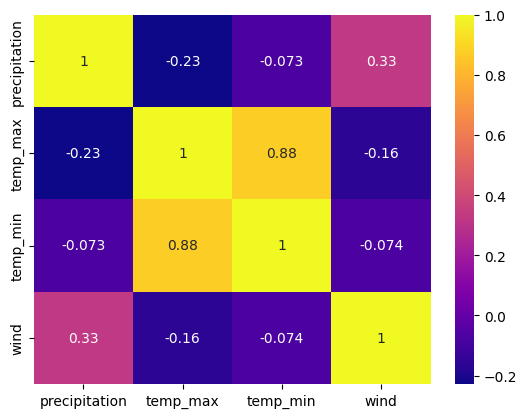

In [ ]:
sns.heatmap(corr, annot=True,cbar=True,  cmap='plasma')

In [ ]:
df['weather'].value_counts()

,count
weather,
rain,641
sun,640
fog,101
drizzle,53
snow,26


In [ ]:
df['weather'] = df['weather'].map({"rain":0,'sun':1,'fog':2,'drizzle':3,'snow':4})

In [ ]:
df['weather'].value_counts()

,count
weather,
0,641
1,640
2,101
3,53
4,26


In [ ]:
df['date'].value_counts()

,count
date,
2015-12-31,1
2012-01-01,1
2012-01-02,1
2012-01-03,1
2012-01-04,1
...,...
2012-01-10,1
2012-01-09,1
2012-01-08,1


In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df

,date,precipitation,temp_max,temp_min,wind,weather,year,month,day
0,2012-01-01,0.0,12.8,5.0,4.7,3,2012,1,1
1,2012-01-02,10.9,10.6,2.8,4.5,0,2012,1,2
2,2012-01-03,0.8,11.7,7.2,2.3,0,2012,1,3
3,2012-01-04,20.3,12.2,5.6,4.7,0,2012,1,4
4,2012-01-05,1.3,8.9,2.8,6.1,0,2012,1,5
...,...,...,...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,0,2015,12,27
1457,2015-12-28,1.5,5.0,1.7,1.3,0,2015,12,28
1458,2015-12-29,0.0,7.2,0.6,2.6,2,2015,12,29
1459,2015-12-30,0.0,5.6,-1.0,3.4,1,2015,12,30


In [ ]:
X = df.drop(['date','weather'],axis=1)
y = df['weather']

In [ ]:
X.shape

(1461, 7)

In [ ]:
y.shape

(1461,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(1168, 7)

In [ ]:
X_test.shape

(293, 7)

In [ ]:
df.shape

(1461, 9)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[df.select_dtypes(include=[np.number]).columns] = scaler.fit_transform(df.select_dtypes(include=[np.number]))

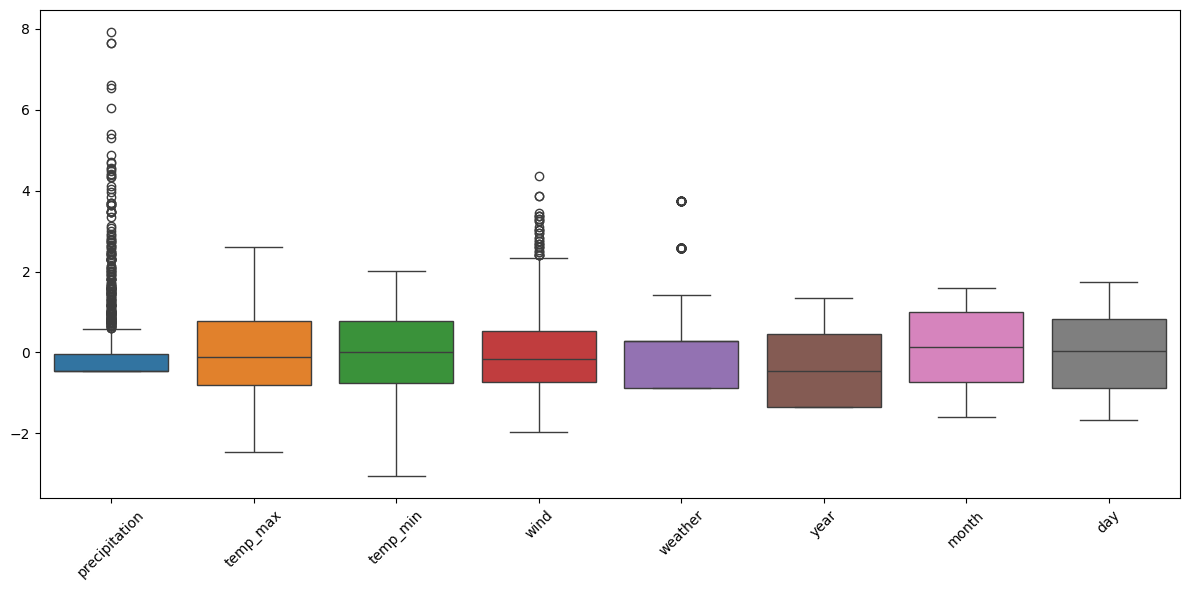

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=weather)

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


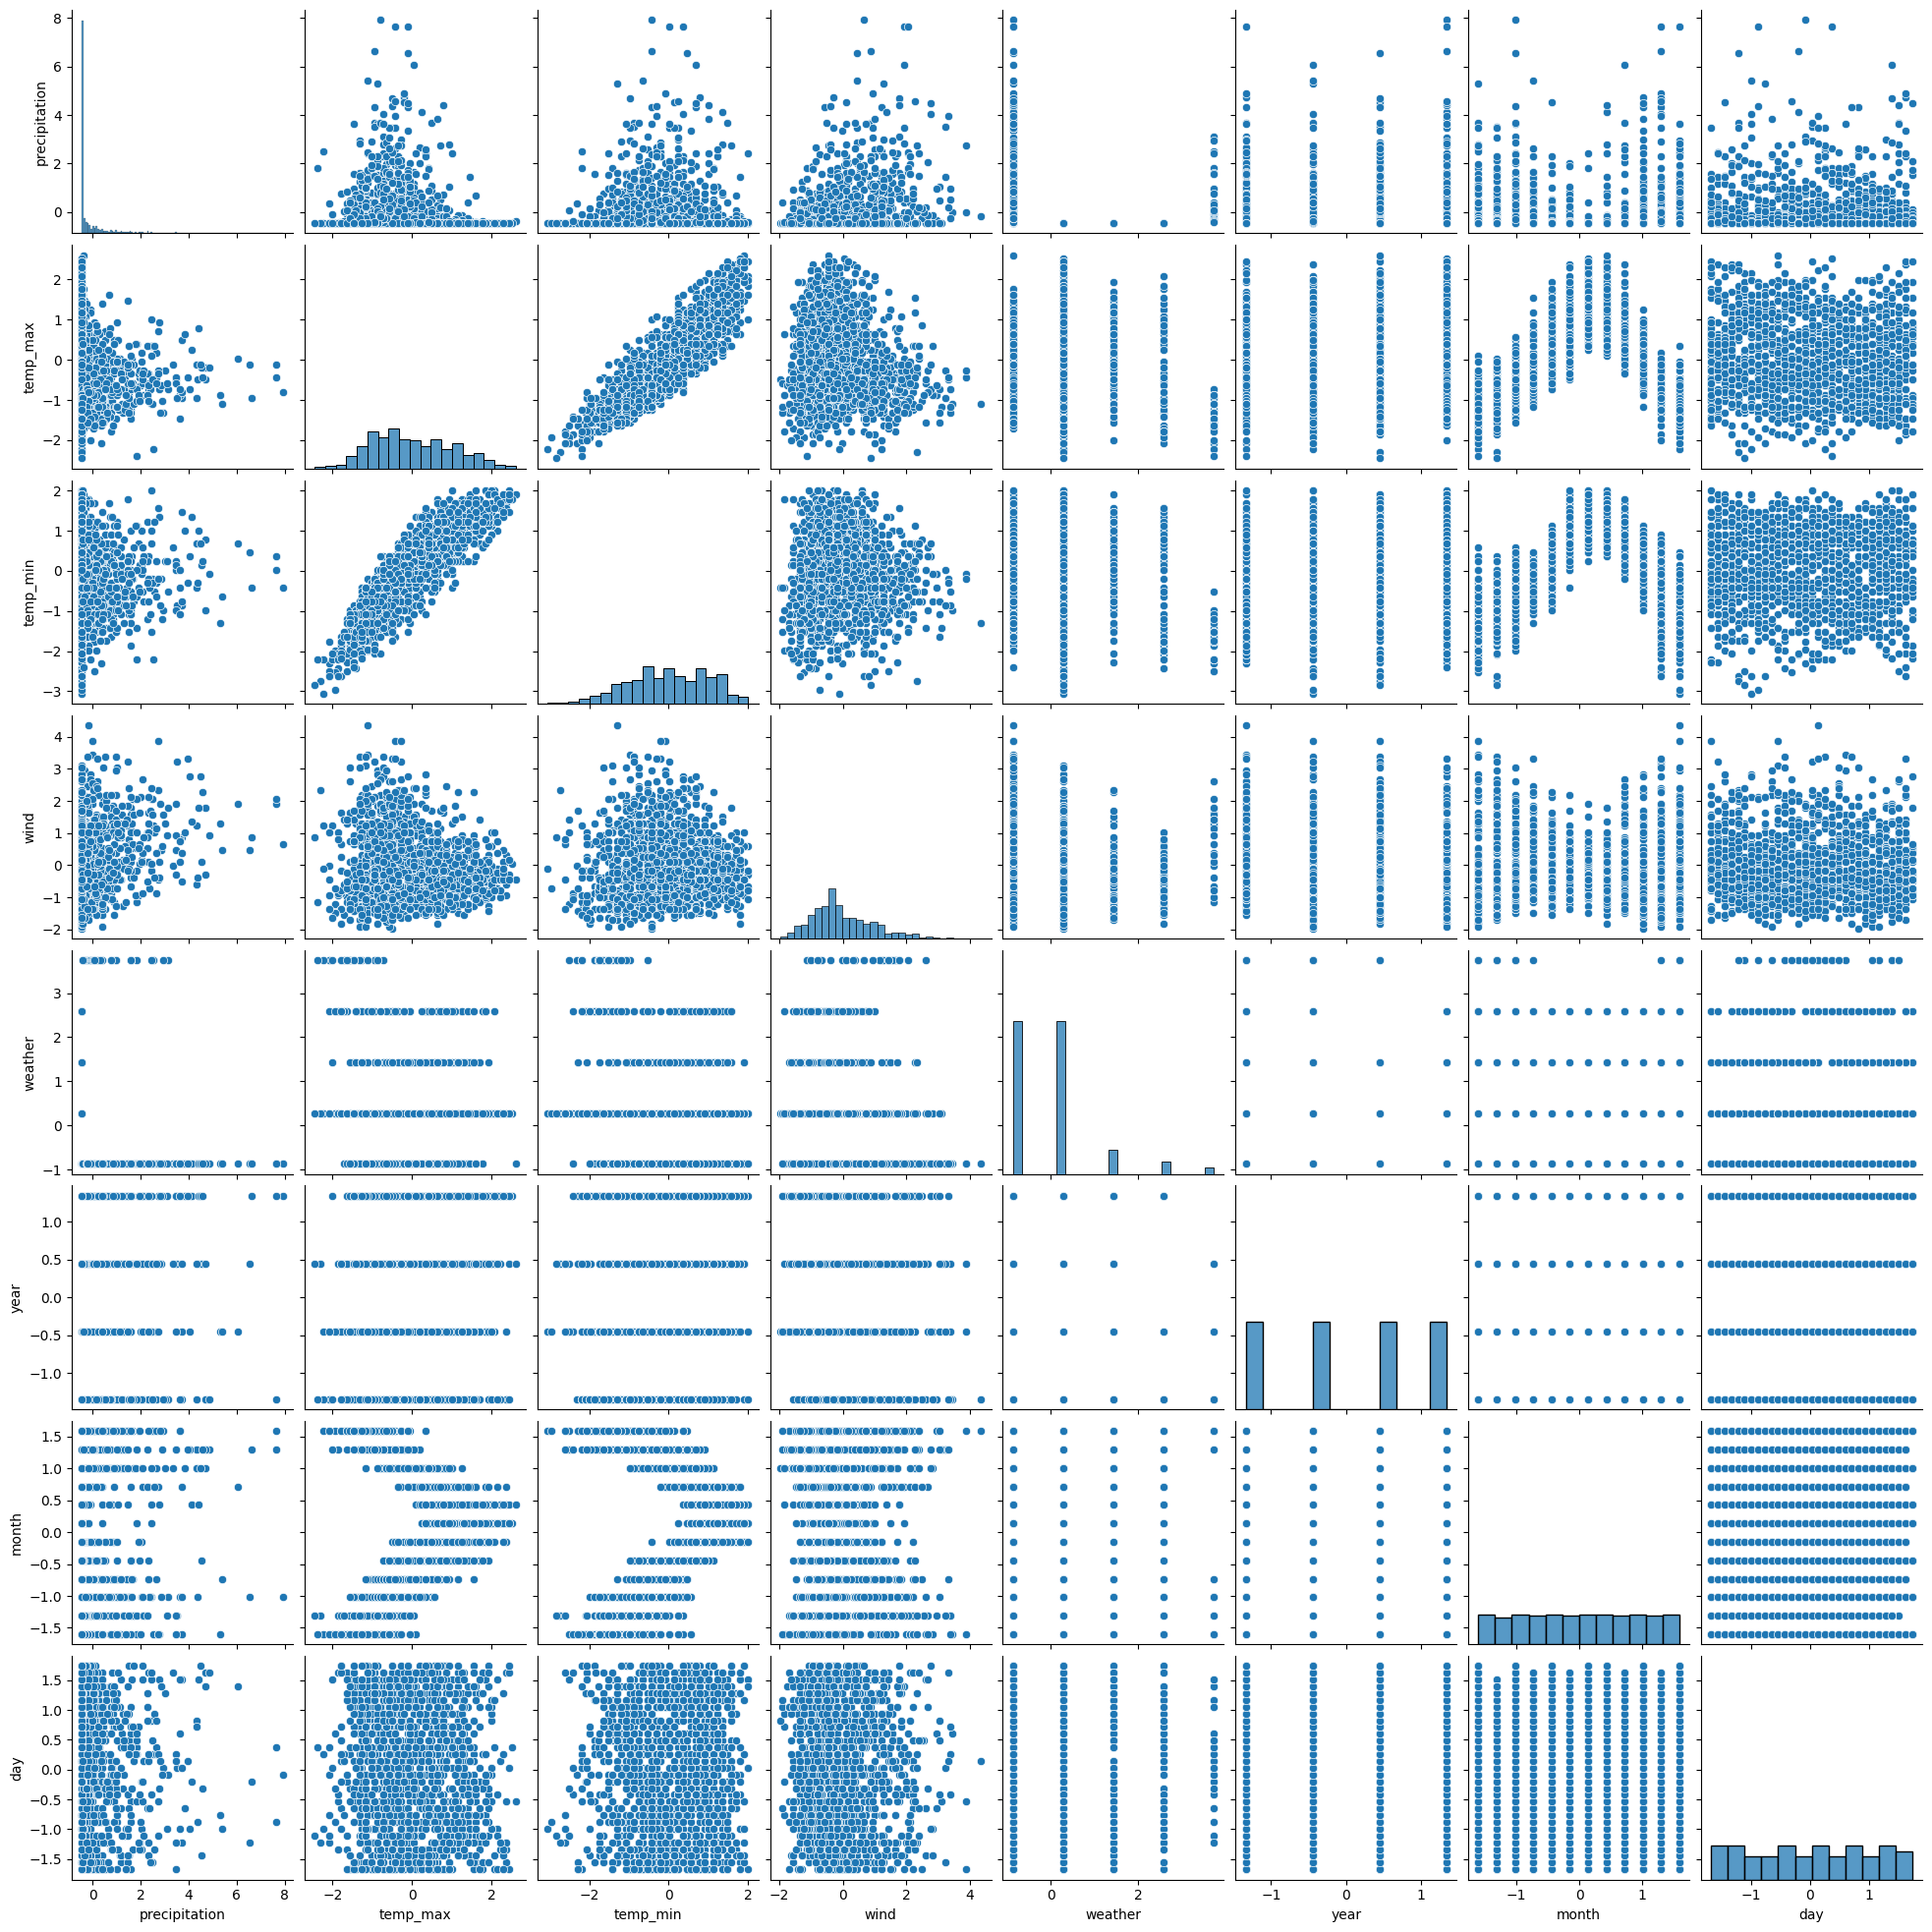

In [ ]:
sns.pairplot(df)

<Axes: ylabel='Count'>

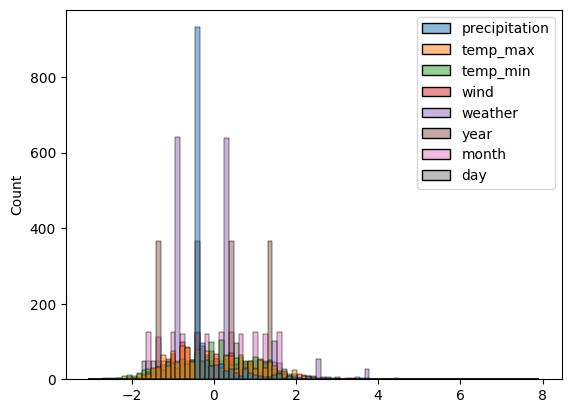

In [ ]:
sns.histplot(df)

<Axes: >

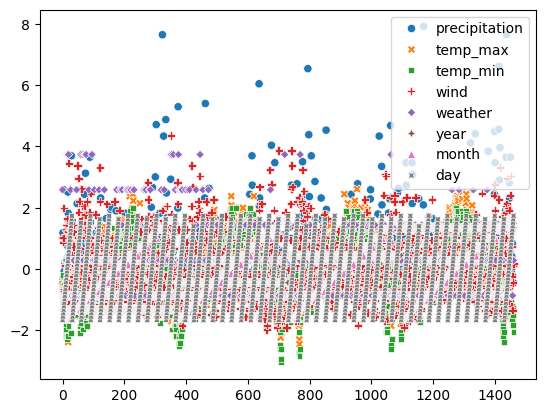

In [ ]:
sns.scatterplot(df)

In [ ]:
df.corr()


,date,precipitation,temp_max,temp_min,wind,weather,year,month,day
date,1.000000,0.014292,0.145827,0.164249,-0.039163,-0.025886,0.968246,0.250292,0.022101
precipitation,0.014292,1.000000,-0.228555,-0.072684,0.328045,-0.290174,0.007034,0.027789,0.021649
temp_max,0.145827,-0.228555,1.000000,0.875687,-0.164857,0.111949,0.112499,0.154198,-0.040376
temp_min,0.164249,-0.072684,0.875687,1.000000,-0.074185,-0.056792,0.114654,0.216689,-0.008082
wind,-0.039163,0.328045,-0.164857,-0.074185,1.000000,-0.193540,-0.027417,-0.048125,-0.033699
weather,-0.025886,-0.290174,0.111949,-0.056792,-0.193540,1.000000,-0.022111,-0.017565,-0.001724
year,0.968246,0.007034,0.112499,0.114654,-0.027417,-0.022111,1.000000,0.001204,-0.001384
month,0.250292,0.027789,0.154198,0.216689,-0.048125,-0.017565,0.001204,1.000000,0.010522
day,0.022101,0.021649,-0.040376,-0.008082,-0.033699,-0.001724,-0.001384,0.010522,1.000000


In [ ]:
corr_matrix = df.corr(numeric_only=True)
sorted_corr = (
    corr_matrix
    .unstack()
    .sort_values(ascending=False)
)
sorted_corr = sorted_corr[sorted_corr.index.get_level_values(0) != sorted_corr.index.get_level_values(1)]
sorted_corr = sorted_corr[~sorted_corr.duplicated()]
sorted_corr

,,0
temp_max,temp_min,0.875687
wind,precipitation,0.328045
temp_min,month,0.216689
month,temp_max,0.154198
temp_min,year,0.114654
year,temp_max,0.112499
temp_max,weather,0.111949
month,precipitation,0.027789
precipitation,day,0.021649
month,day,0.010522


<Axes: >

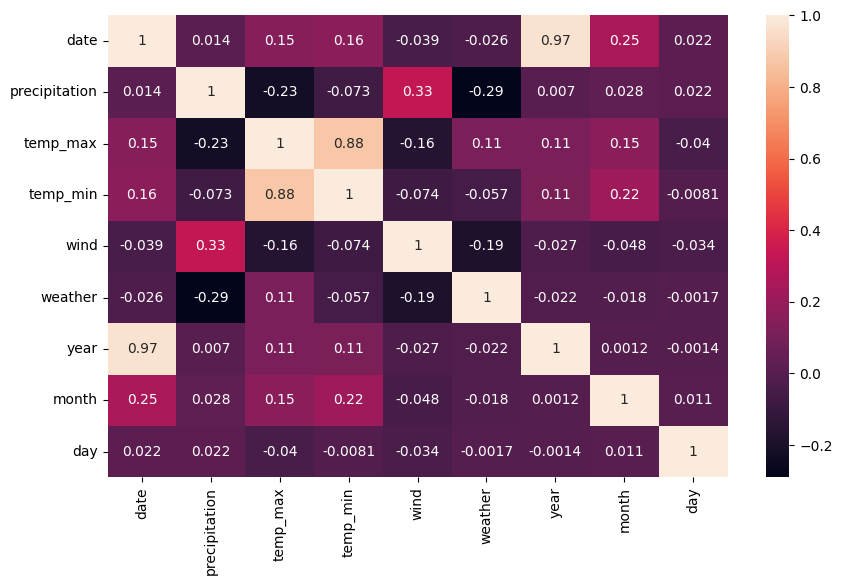

In [ ]:
plt.rcParams['figure.figsize']=10,6
sns.heatmap(df.corr(),annot=True)

<ipython-input-69-649f052b6fe6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


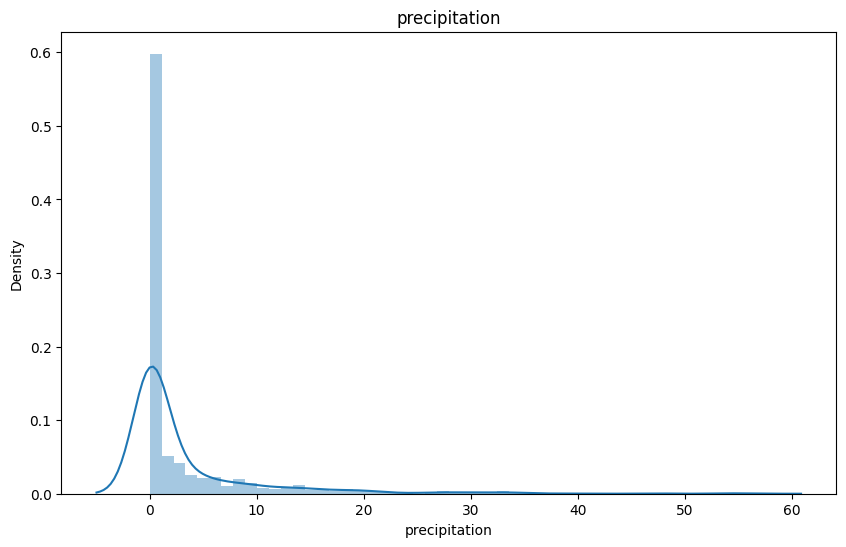

<ipython-input-69-649f052b6fe6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


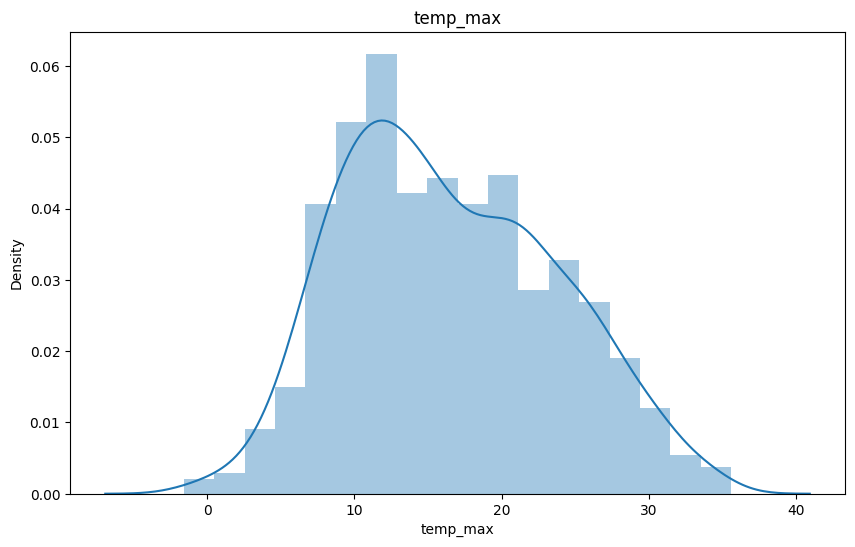

<ipython-input-69-649f052b6fe6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


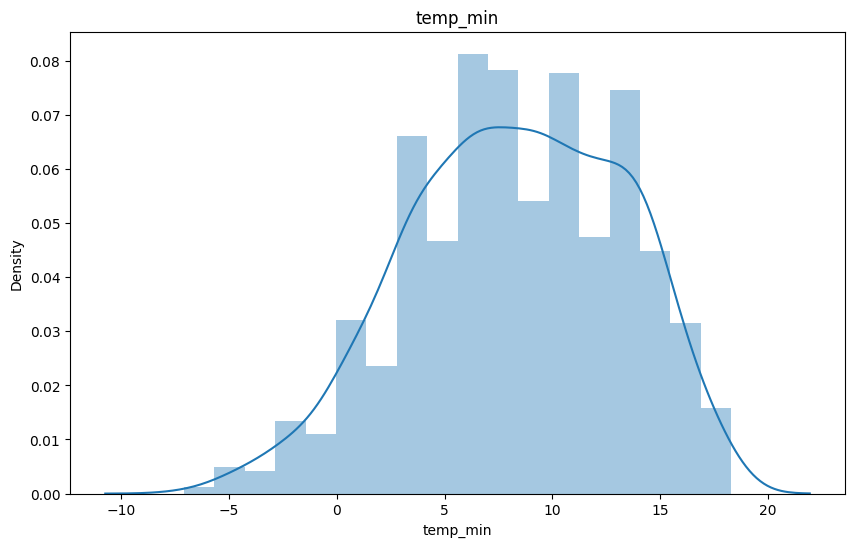

<ipython-input-69-649f052b6fe6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


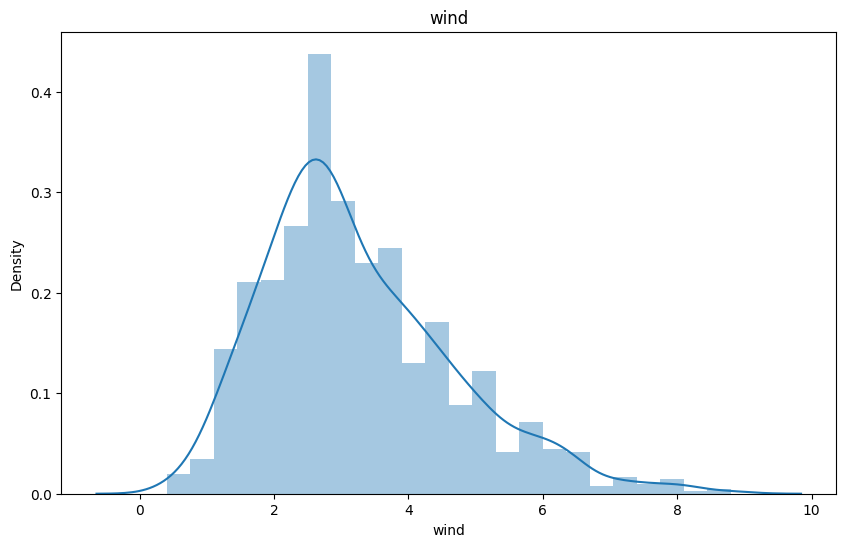

<ipython-input-69-649f052b6fe6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


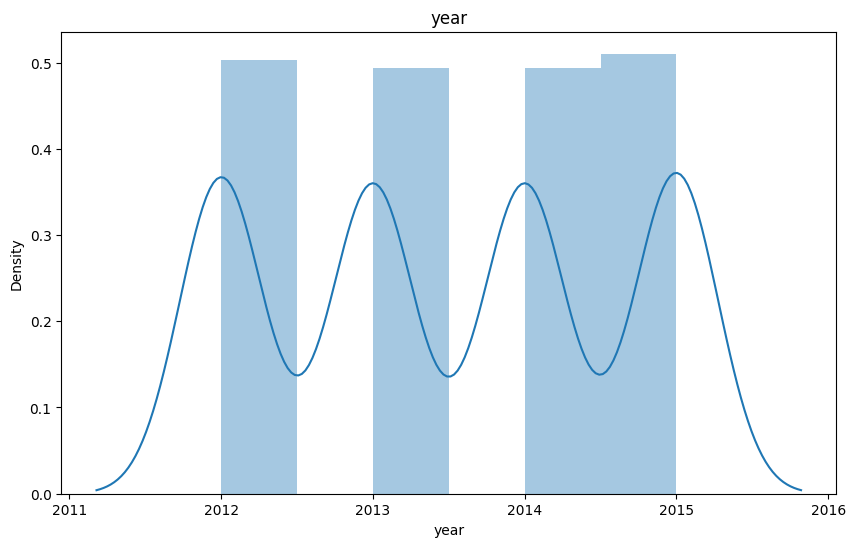

<ipython-input-69-649f052b6fe6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


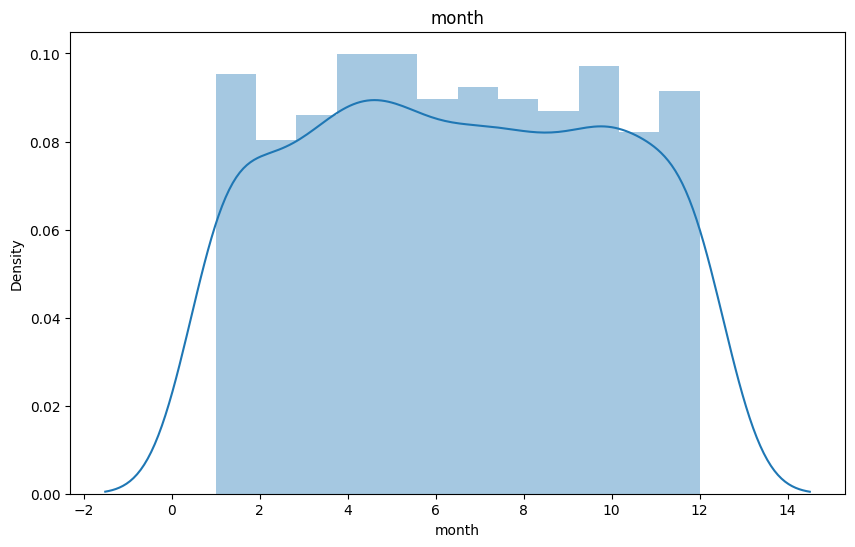

<ipython-input-69-649f052b6fe6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


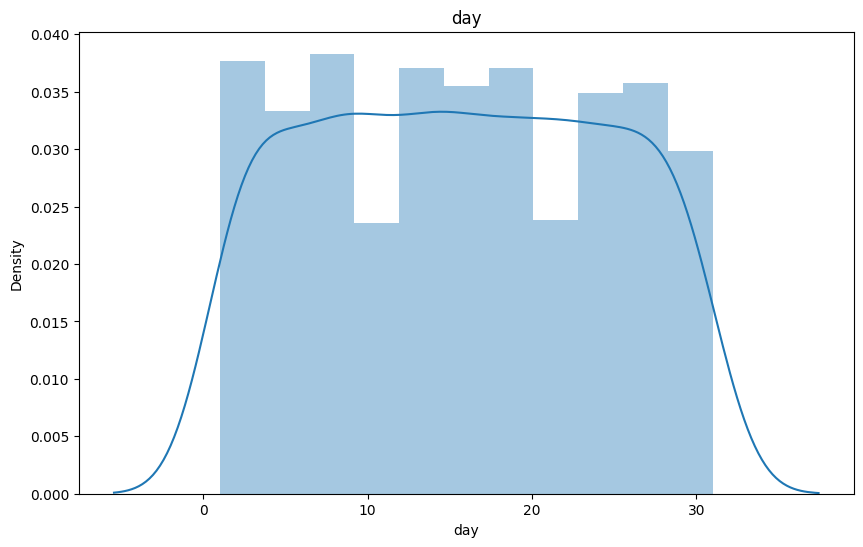

In [ ]:
for col in X_train.columns:
    plt.figure(figsize=(10,6))
    sns.distplot(X_train[col])
    plt.title(col)
    plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
models = {
    "dtc": DecisionTreeClassifier(),
    "rfc": RandomForestClassifier(),
    "gbn": GaussianNB()
}

for name,mod in models.items():
    mod.fit(X_train,y_train)
    y_pred = mod.predict(X_test)

    print(f"{name} with accuracy {accuracy_score(y_test,y_pred)}")
    print(classification_report(y_test,y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

lg with accuracy 0.7747440273037542
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       120
           1       0.72      0.94      0.82       131
           2       0.00      0.00      0.00        25
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         8

    accuracy                           0.77       293
   macro avg       0.31      0.36      0.33       293
weighted avg       0.67      0.77      0.72       293

dtc with accuracy 0.7815699658703071
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       120
           1       0.83      0.79      0.81       131
           2       0.39      0.44      0.42        25
           3       0.30      0.33      0.32         9
           4       0.44      0.50      0.47         8

    accuracy                           0.78       293
   macro avg       0.57      0.59      0.58       293
weig

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)

In [ ]:
def weather_pred(precipitation,temp_max,temp_min,wind,year,month,day):
    features = np.array([[precipitation,temp_max,temp_min,wind,year,month,day]])
    prediction_out = gnb.predict(features).reshape(1,-1)

    return prediction_out[0]

In [ ]:
precipitation = 1.5
temp_max = 12.2
temp_min = 9.4
wind = 3.8
year = 2013
month = 4
day = 11

result = weather_pred(precipitation,temp_max,temp_min,wind,year,month,day)
result

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
# 'rain':0,"sun":1,'fog':2,'drizzle':3,'snow':4

if result == 0:
    print("its raining")
elif result == 1:
    print('its sunny')
elif result == 2:
    print('its foggy')
elif result == 3:
    print('its drizzle')
elif result == 4:
    print('its snowing')

else:
    print("there is some error")

its raining


In [ ]:

# rainy: 1.5     12.2    6.7   3.8   2013   4  11

# sunny:   0.0   21.7 13.3 3.2 2013 6 7


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=4)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
y_pred=dt.predict(X_test)
y_pred

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 2, 0, 1, 2, 2, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 4, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 4, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 4, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 4, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 4, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1])

In [ ]:
y_pred1=dt.predict(X_train)
y_pred1

array([1, 0, 0, ..., 0, 1, 2])

In [ ]:
print("testing accuracy",accuracy_score(y_test,y_pred))
print("training accuracy",accuracy_score(y_train,y_pred1))
print("classification report",classification_report(y_test,y_pred))

testing accuracy 0.8498293515358362
training accuracy 0.8690068493150684
classification report               precision    recall  f1-score   support

           0       0.96      0.92      0.94       120
           1       0.78      1.00      0.88       131
           2       1.00      0.20      0.33        25
           3       0.00      0.00      0.00         9
           4       0.60      0.38      0.46         8

    accuracy                           0.85       293
   macro avg       0.67      0.50      0.52       293
weighted avg       0.84      0.85      0.82       293



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


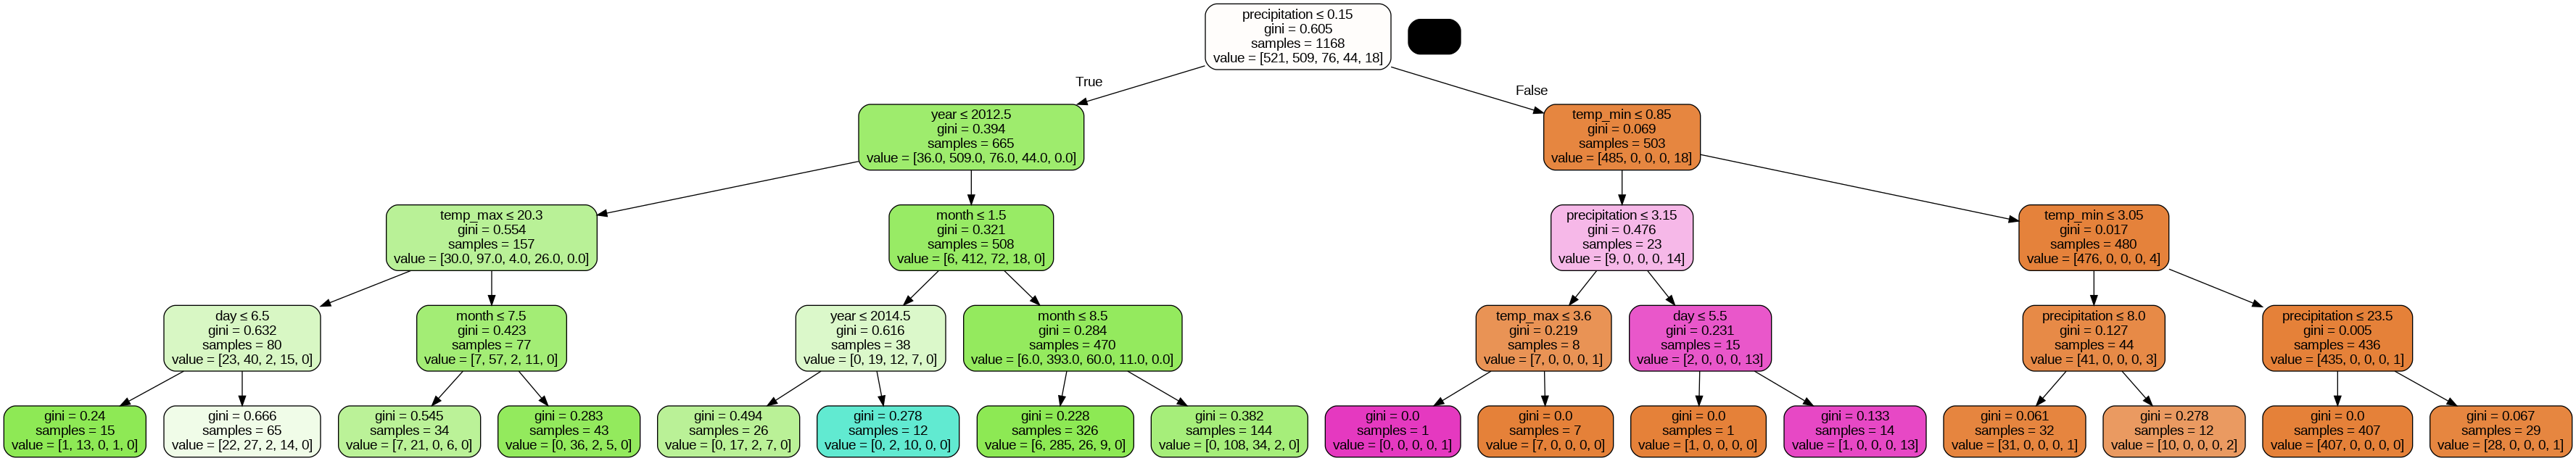

In [ ]:

from six import StringIO
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz
dot_data=StringIO()
export_graphviz(dt,out_file=dot_data,feature_names=X.columns,filled=True,rounded=True,special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


In [ ]:
pd.crosstab(y_test,y_pred)

col_0,0,1,2,4
weather,,,,
0,110,8,0,2
1,0,131,0,0
2,0,20,5,0
3,0,9,0,0
4,5,0,0,3


In [ ]:
#other parameters are  dt=DecisionTreeClassifier(max_depth=4,criterion='entropy')